# 1. Define

#### 1.1 Define the problem

In [43]:
# This project aims at forecasting traffic on JetRail for next 7 months.
# Based on the forecasting, Unicorn Ventures can take a decision, whether to invest in this new form on transportation - JetRail or not.

# 2. Discover

#### 2.1 Loading the data

In [44]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot, autocorrelation_plot

In [45]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [46]:
train_data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


This train data can be rearranged such that 'Datetime' column becomes the index. <br \>
So, instead of reading the train data set as above, we can read it as below.

In [47]:
train_data = pd.read_csv('train.csv', header = 0, index_col = 1, parse_dates = True, squeeze = True)

In [48]:
train_data.head()

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2


Now we have the data such that the Datetime coulmn is the index. So we do not need ID column and can drop it from both our data sets (train and test set).

In [49]:
train_data = train_data.drop(['ID'], axis = 1)

In [50]:
train_data.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [51]:
test_data.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [52]:
test_data = test_data.drop(['ID'], axis = 1)

In [53]:
test_data.head()

,Datetime
0,26-09-2014 00:00
1,26-09-2014 01:00
2,26-09-2014 02:00
3,26-09-2014 03:00
4,26-09-2014 04:00


Now the test data set consists of just 'Datetime' column. <br \>
For now, we will not make it index, as done with the train data set, as we do not have other column 'Count'.

#### 2.2 Understading the data

In [54]:
# First let's create a copy of the original data set to avoid any changes in it.
train = train_data.copy()
test = test_data.copy()

In [55]:
# Dimensions of the data set
train.shape

(18288, 1)

In [56]:
train.columns

Index(['Count'], dtype='object')

In [57]:
train.tail()

,Count
Datetime,
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702
2014-09-25 22:00:00,580
2014-09-25 23:00:00,534


The train data set consists of one column, 'Count' with 18,288 entries. <br\>
The dates in this data set ranges from 25th August 2012 to 25th September 2014.

In [58]:
test.shape

(5112, 1)

In [59]:
test.columns

Index(['Datetime'], dtype='object')

In [60]:
test.tail()

,Datetime
5107,26-04-2015 19:00
5108,26-04-2015 20:00
5109,26-04-2015 21:00
5110,26-04-2015 22:00
5111,26-04-2015 23:00


The test data set consists of one column - 'Datetime' with 5,112 columns. <br \>
We need to predict the 'Count' values in this data set using the 'Datetime' column for the duration starting from 26th Septmeber 2014 to 26th April 2015.

In [61]:
train.dtypes

Count    int64
dtype: object

In [62]:
test.dtypes

Datetime    object
dtype: object

#### 2.4 Exploratory data analysis

In [63]:
train.describe()

,Count
count,18288.000000
mean,138.958115
std,153.467461
min,2.000000
25%,22.000000
50%,84.000000
75%,210.000000
max,1244.000000


There are on an average 139 passengers using JetRail for transportation, based on the data available in the train data set. <br \>
The least busiest day had 2 passengers on JetRail and the most busiest day there were 1244 passengers on board.

In [64]:
# Checking for null values

train.isnull().sum()

Count    0
dtype: int64

There are no null values in train data set.

In [65]:
test.isnull().sum()

Datetime    0
dtype: int64

There are no null values in test data set.

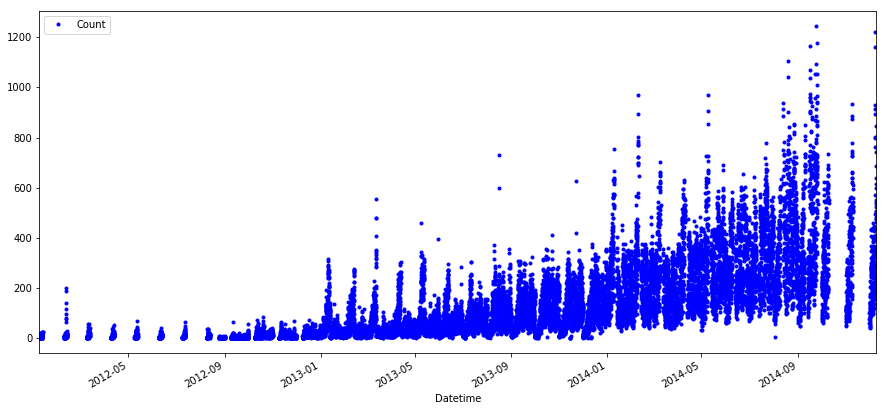

In [66]:
# -------------------------Line Graph ------------------------------ #

plt.rcParams["figure.figsize"]=15,7
train.plot(style = 'b.')
plt.show()

This graph shows how the data is spread across different times. <br \>
On the x-axis are the index values, which are Datetime values in this data set. <br \>
On the y-axis are the count of commuters using JetRail as mode of transportation. <br \>
__This graph shows that as time passes by the number of commuter on JetRail increases.__ <br \>
This observation makes sense, as the time passes by the number of people residing in a city increases which can positively affect the number of people using transportation.

Let's make the data more explainable by splitting the data set into different time gaps which would help us better understand the count of commuters on JetRail.

In [67]:
train['Year'] = [train.index[i].year for i in range(len(train.index))]
train['Month'] = [train.index[i].month for i in range(len(train.index))]
train['Day'] = [train.index[i].day for i in range(len(train.index))]

In [68]:
train.head()

,Count,Year,Month,Day
Datetime,,,,
2012-08-25 00:00:00,8,2012,8,25
2012-08-25 01:00:00,2,2012,8,25
2012-08-25 02:00:00,6,2012,8,25
2012-08-25 03:00:00,2,2012,8,25
2012-08-25 04:00:00,2,2012,8,25


In [69]:
# Grouping the data set into years to visualize the trend.
years_group = train.groupby(train['Year'])

In [71]:
years_group.mean()

,Count,Year,Month,Day
Year,,,,
2012,11.282946,2012.0,8.883721,17.906977
2013,78.306849,2013.0,6.526027,15.720548
2014,283.017102,2014.0,5.548507,14.847015


In [72]:
day_group = train.groupby(train['Day'])
day_group.mean()

,Count,Year,Month
Day,,,
1,85.305556,2013.500000,6.500000
2,110.739583,2013.500000,6.500000
3,112.121528,2013.500000,6.500000
4,138.781250,2013.500000,6.500000
5,132.236111,2013.500000,6.500000
6,198.392361,2013.500000,6.500000
7,207.868056,2013.500000,6.500000
8,219.618056,2013.500000,6.500000
9,190.307870,2013.000000,6.500000


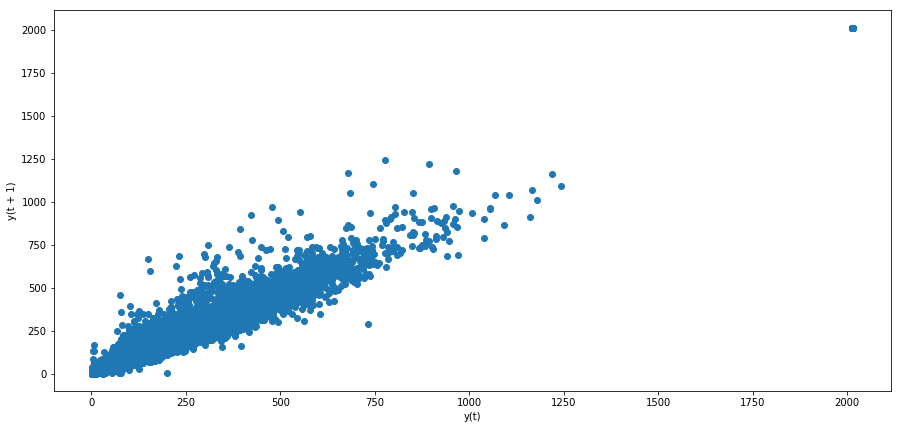

In [73]:
# -------------------------Lag Plot ------------------------------ #
lag_plot(train)
plt.show()

A lag_plot is used to explore the relationship between each observation and its lag value. <br\>
In the above graph, the observations appears to have a strong positive correlation with their lag values, as the points are closer to the diagonal and is along diagonal starting from bottom-left to top right corner of the ploe.

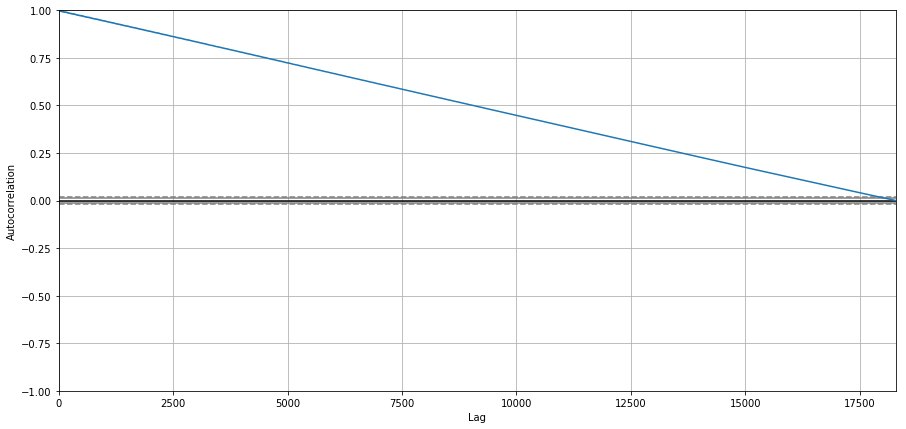

In [74]:
# -------------------------Auto-correlation Plot ------------------------------ #
autocorrelation_plot(train)
plt.show()

The dotted lines are provided to show that any value above them are statistically significant. <br\>
In our case, all the values are statistically significant and since all the values are above 0, we can say that there is no randomness in the data.

#### Resampling

In [75]:
month_group = train.groupby(train['Month'])
month_group.mean()

,Count,Year,Day
Month,,,
1,110.138889,2013.380952,15.888889
2,121.315789,2013.368421,14.403509
3,113.362434,2013.380952,15.888889
4,139.144809,2013.377049,15.393443
5,161.732804,2013.380952,15.888889
6,161.016393,2013.377049,15.393443
7,178.238095,2013.380952,15.888889
8,188.107143,2013.242857,17.100000
9,163.679054,2013.000000,16.027027


On an average, maximum number of passengers have used JetRail in the months of July, August and September. <br\>
There is a sudden drop in the commuter count from September to October, where October records the least number of passengers in the entire year.

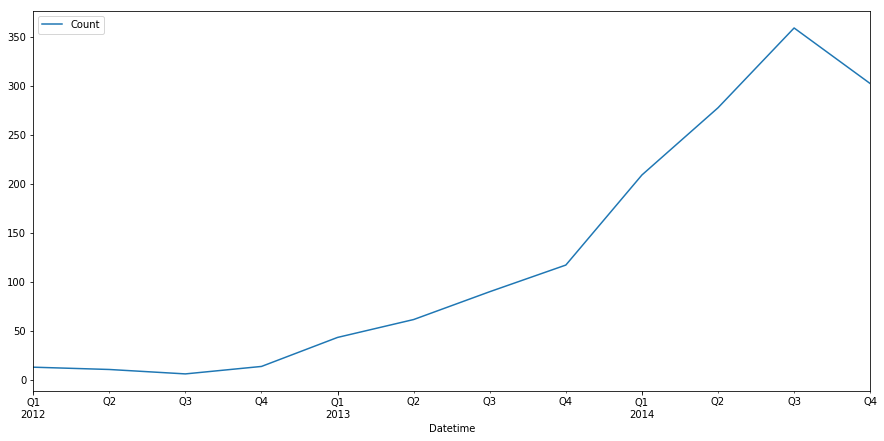

In [82]:
# Downsampling into quarters

train_resample = train.drop(['Year', 'Month', 'Day'], axis=1)
resample = train_resample.resample('Q')
quaterly_mean_count = resample.mean()
quaterly_mean_count.plot()

Downsampling the dataset into th 4 quarters of the year, it can be clearly observed that Q3 of 2014 saw a tremendous increase in the count of passengers using JetRail, which confirms our previous output.

In [79]:
years_group = train.groupby(train['Year'])
years_group.mean()

,Count,Month,Day
Year,,,
2012,11.282946,8.883721,17.906977
2013,78.306849,6.526027,15.720548
2014,283.017102,5.548507,14.847015


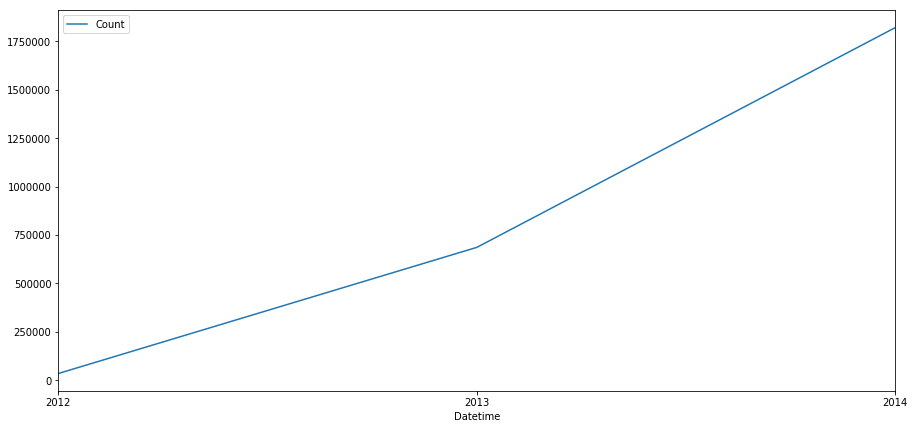

In [83]:
resample_year = train_resample.resample('A')
year_sum_count = resample_year.sum()
year_sum_count.plot()

Here, we can confirm that as the year is passing by, the number of commuters are increasing. Hence, this can prove to be a good investment for Unicorn Ventures.

# 3. Develop

# 4. Deploy